In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

plt.rcParams['font.family'] = 'Times New Roman'

data = pd.read_excel('res/RES_(0_use30).xlsx')

In [2]:
# Eight algorithm results are compared in a dataframe and visualized in Excel
df = data.copy()
arr1 = df.iloc[:,0].to_numpy().reshape(5,5,7) # 缺失类型、缺失率、对比算法
arr2 = df.iloc[:,-1].to_numpy().reshape(5,5,7)[:, :, [2]]
arr = np.concatenate((arr1, arr2), axis=2)
arr = pd.DataFrame(arr.reshape(-1,8).T)
arr.columns = ['MCAR_10%', 'MCAR_30%', 'MCAR_50%', 'MCAR_70%', 'MCAR_90%',
               'MAR_10%', 'MAR_30%', 'MAR_50%', 'MAR_70%', 'MAR_90%',
               'MNAR_10%', 'MNAR_30%', 'MNAR_50%', 'MNAR_70%', 'MNAR_90%',
               'MIS_10%', 'MIS_30%', 'MIS_50%', 'MIS_70%', 'MIS_90%',
               'MIB_10%', 'MIB_30%', 'MIB_50%', 'MIB_70%', 'MIB_90%']
arr.index = ['MICE', 'KNNI', 'LOCF', 'GRUD', 'SSGAN', 'SAITS', 'iTransformer', 'VCAAN']
# arr.to_excel('res/RES_compare.xlsx')

In [2]:
# TEST
df = data.copy()
arr = df.to_numpy().reshape(5,5,7,5)

missing_types = ['MCAR', 'MAR', 'MNAR', 'MIS', 'MIB']
missing_rates = ['10%', '30%', '50%', '70%', '90%']
list_alpha = [0.3, 0.45, 0.6, 0.75, 0.9]
initial_algorithms = ['MICE', 'KNNI', 'LOCF', 'GRUD', 'SSGAN', 'SAITS', 'iTransformer']
model_versions = ['Original', 'CCA', 'VCA', 'CCAAN', 'VCAAN']
alphabets = ['a', 'b', 'c', 'd', 'e']
# colors for different missing types and markers for different initial algorithms
# colors = ['#63C384', '#008AEF', '#FF555A', '#D6007B', '#FFB628']
# markers = ['o', 's', 'D', '^', 'v', 'p', '*']
colors = ['#63C384', '#008AEF', '#FF555A', '#D6007B', '#FFB628', '#4E79A7', '#F28E2B']
markers = ['o', 's', 'D', '^', 'v', 'p', '*']

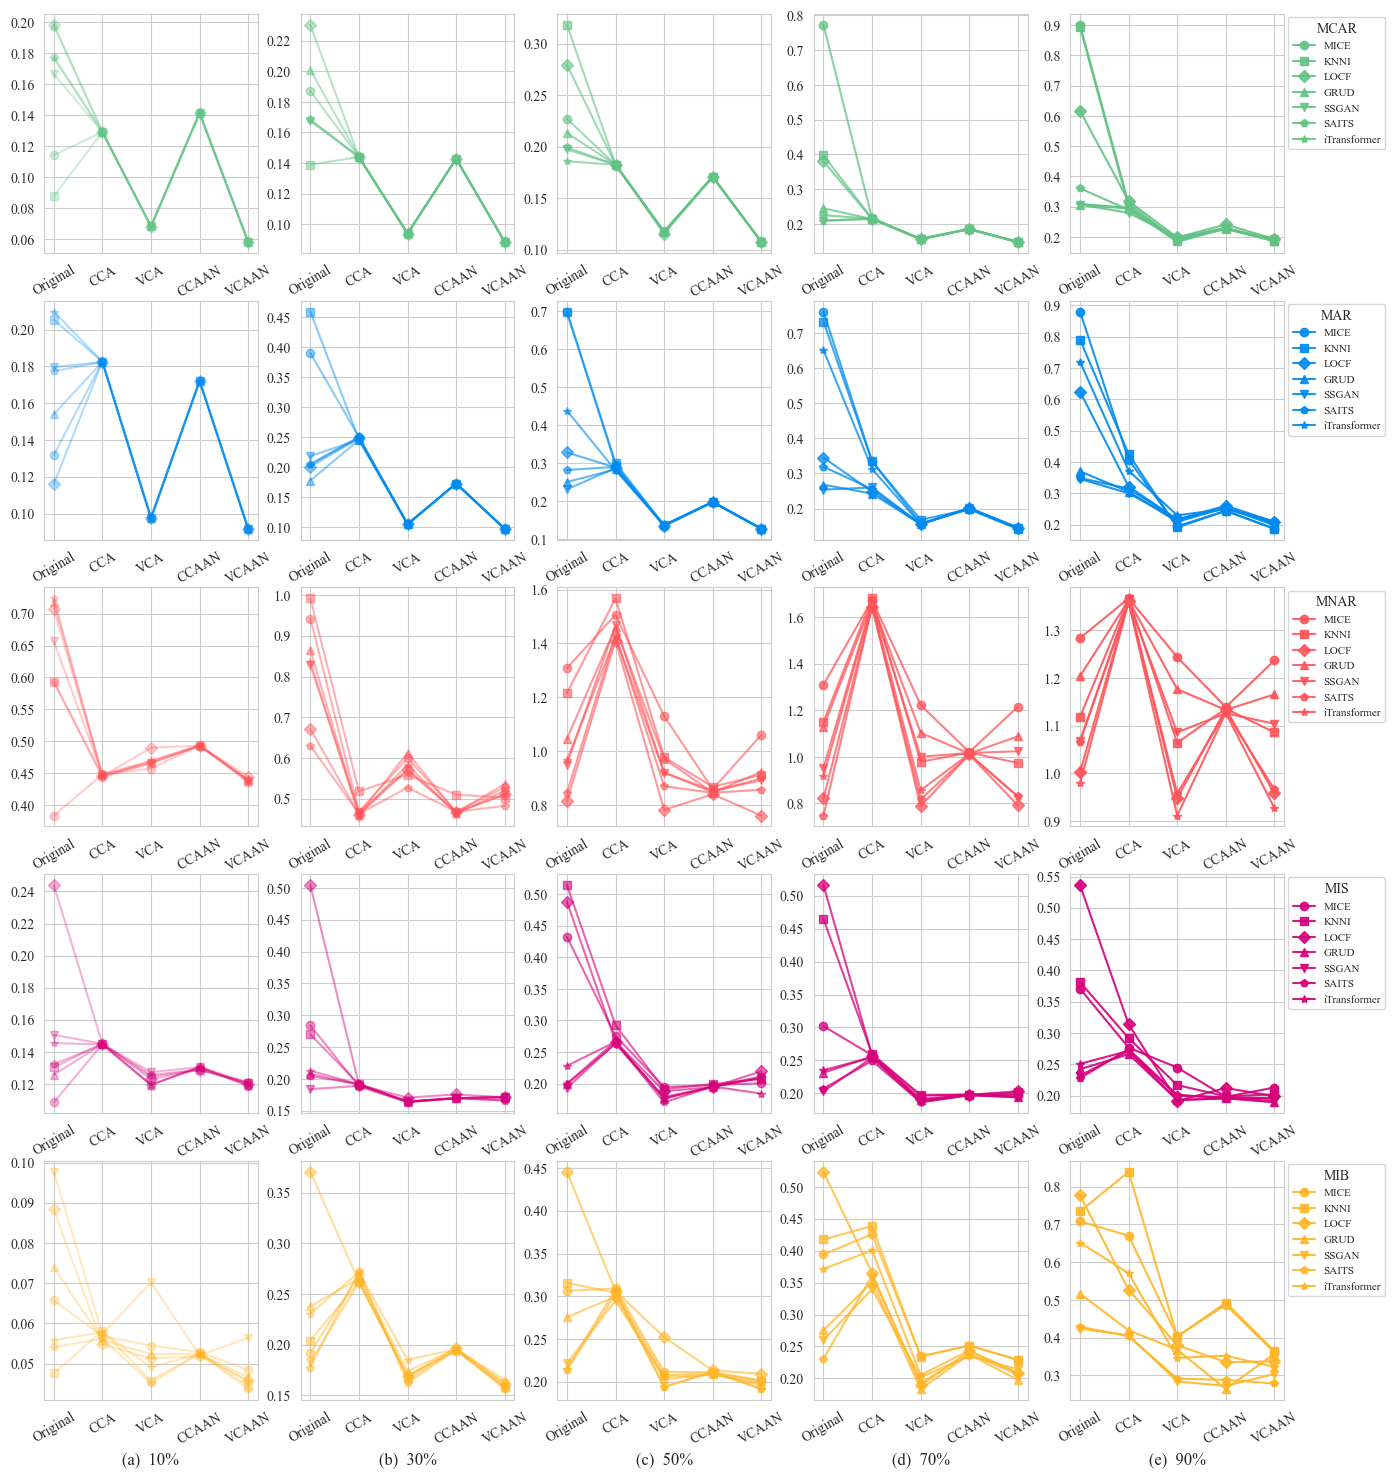

In [3]:
# 画一个5行5列的子图
fig, axs = plt.subplots(5, 5, figsize=(16, 18))
for i in range(5): # missing types
    for j in range(5): # missing rates
        y_ij = arr[i,j]
        for k in range(7): # initial algorithms
            y_ijk = y_ij[k]
            axs[i,j].plot(y_ijk, label=initial_algorithms[k], marker=markers[k], color=colors[i], alpha=list_alpha[j])
            axs[i,j].set_xticks(range(len(model_versions)))
            axs[i,j].set_xticklabels(model_versions, rotation=30, ha='center', fontsize=10)
        if i==4:
            axs[i,j].set_xlabel(f'({alphabets[j]})  {missing_rates[j]}', fontsize=12)
        if j==4:
            # legend 放右上角，外面
            axs[i,j].legend(title=missing_types[i], fontsize=8, title_fontsize=10, loc='upper right', bbox_to_anchor=(1.5, 1.01))            
plt.savefig('res/figs/fig_comparison_55.png', dpi=300, bbox_inches='tight')
plt.show()

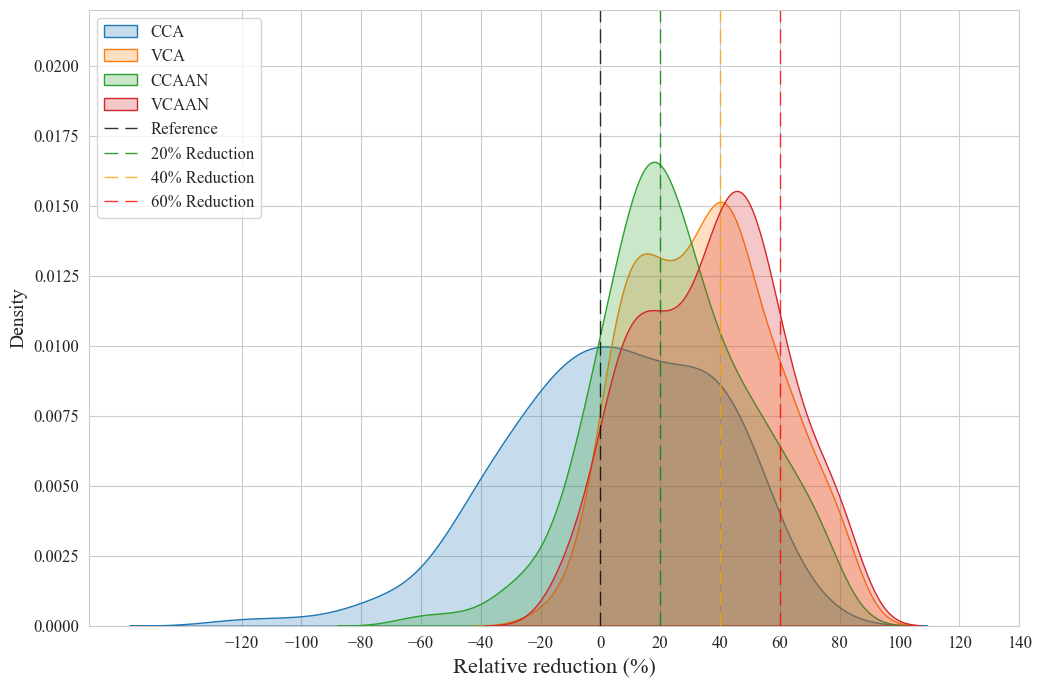

In [3]:
# kernel density estimation
df = data.copy()
df.columns = ['Baseline', 'CCA', 'VCA', 'CCAAN', 'VCAAN']
# calculate the relative reduction percentage
for col in df.columns[1:]:
    df[col] = (df['Baseline'] - df[col]) / df['Baseline'] * 100

plt.figure(figsize=(12, 8))
for col in df.columns[1:]:
    sns.kdeplot(df[col], label=col, fill=True)  # 使用 fill=True 替代 shade=True

plt.xlabel('Relative reduction (%)', fontsize=16)
plt.ylabel('Density', fontsize=14)

plt.xticks(np.arange(-120, 150, 20), fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 0.022)

lines = [
    {'x': 0, 'color': 'black', 'label': 'Reference'},
    {'x': 20, 'color': 'green', 'label': '20% Reduction'},
    {'x': 40, 'color': 'orange', 'label': '40% Reduction'},
    {'x': 60, 'color': 'red', 'label': '60% Reduction'}
]

# add vertical lines
for line in lines:
    plt.axvline(
        x=line['x'], 
        color=line['color'], 
        alpha=.8, 
        linewidth=1, 
        linestyle=(0, (10, 5)),  # custom dash pattern
        label=line['label']
    )

plt.legend(fontsize=12, title_fontsize=14, loc='upper left')
plt.savefig('res/figs/fig_kdeplot.png', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
df = data.copy()
for col in df.columns[1:]:
    df[col] = (df['Baseline'] - df[col]) / df['Baseline'] * 100
df.describe()

,Baseline,CCA,VCA,CCAAN,VCAAN
count,175.000000,175.000000,175.000000,175.000000,175.000000
mean,0.433569,3.704047,34.743631,23.845049,36.873777
std,0.313691,34.931509,22.752931,25.304570,23.545782
min,0.047624,-120.349372,-19.270210,-61.142970,-13.714728
25%,0.203454,-19.451039,16.370142,8.788501,18.235042
50%,0.306283,5.378367,35.168613,21.009910,38.925106
75%,0.654279,31.622710,50.482038,40.070180,53.322964
max,1.310254,71.957041,80.706626,76.042234,81.884439


In [4]:
# output results with latex table if needed
df = data.copy()

for col in df.columns[1:]:
    df[col] = (df['Baseline'] - df[col]) / df['Baseline'] * 100
df = df.describe().iloc[3:,1:]
df = df.map(lambda x: f'{x:.2f}%')
# latex表格，三线表
table = df.to_latex(index=True,  # 不显示行索引
    column_format='ccccc',  # 列格式：左对齐，三列居中
    position='htbp',  # 表格位置：here, top, bottom, page
    caption='Quartile of the percent improvement in imputation loss',  # 表格标题
    label='tab:Quartile_improve',  # 表格标签
    escape=True  # 转义特殊字符
    )
print(table)

\begin{table}[htbp]
\caption{Quartile of the percent improvement in imputation loss}
\label{tab:Quartile_improve}
\begin{tabular}{ccccc}
\toprule
 & CCA & VCA & CCAAN & VCAAN \\
\midrule
min & -120.35\% & -19.27\% & -61.14\% & -13.71\% \\
25\% & -19.45\% & 16.37\% & 8.79\% & 18.24\% \\
50\% & 5.38\% & 35.17\% & 21.01\% & 38.93\% \\
75\% & 31.62\% & 50.48\% & 40.07\% & 53.32\% \\
max & 71.96\% & 80.71\% & 76.04\% & 81.88\% \\
\bottomrule
\end{tabular}
\end{table}

